# Titanic data project

In this notebook the well renowned Titanic dataset will be imported and explored. \
The goal of this project is to achieve high classification accuracy using different sklearn models.

## Importing necessary libraries

Importing libraries relevant for the whole exercise. \
Packages needed for specific usages will be imported in the relevant cells.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Importing data

In this part we use the already splitted data given in the Madors' exercise, since we want our train-test split to contain the same samples.

In [4]:
path_train = "../data/train.csv"
path_test = "../data/test.csv"
train = pd.read_csv(path_train)
test = pd.read_csv(path_test)

Lets take a quick peak at the data

In [5]:
train.head(100)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,1,"Cleaver, Miss. Alice",female,22.0,0,0,113781,151.5500,NaN,S
1,0,2,"Hunt, Mr. George Henry",male,33.0,0,0,SCO/W 1585,12.2750,NaN,S
2,1,3,"Nakid, Miss. Maria (""Mary"")",female,1.0,0,2,2653,15.7417,NaN,C
3,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.5500,NaN,S
4,0,2,"Mitchell, Mr. Henry Michael",male,70.0,0,0,C.A. 24580,10.5000,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
95,0,2,"Ponesell, Mr. Martin",male,34.0,0,0,250647,13.0000,NaN,S
96,0,3,"Christmann, Mr. Emil",male,29.0,0,0,343276,8.0500,NaN,S
97,0,3,"Augustsson, Mr. Albert",male,23.0,0,0,347468,7.8542,NaN,S
98,0,2,"Pernot, Mr. Rene",male,NaN,0,0,SC/PARIS 2131,15.0500,NaN,C


## Data Cleaning 

K den, we need to remove irrelevant fields and change the notation of some fields.

In [6]:
# first we remove the features that wont help us, and mostly have missing values.

train.drop(["Cabin", "Ticket"], axis=1, inplace=True)
test.drop(["Cabin", "Ticket"], axis=1, inplace=True)
train.reset_index(drop=True, inplace=True)
test.reset_index(drop=True, inplace=True)
train.head(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,1,"Cleaver, Miss. Alice",female,22.0,0,0,151.5500,S
1,0,2,"Hunt, Mr. George Henry",male,33.0,0,0,12.2750,S
2,1,3,"Nakid, Miss. Maria (""Mary"")",female,1.0,0,2,15.7417,C
3,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,69.5500,S
4,0,2,"Mitchell, Mr. Henry Michael",male,70.0,0,0,10.5000,S


Now lets see how many NaN values we have in the table (should we drop 'em?)

In [7]:
num_of_nan = train.isnull().sum(axis = 0)
print(f"There are {train.shape[0]} entries in the training set.")
num_of_nan

There are 712 entries in the training set.


Survived      0
Pclass        0
Name          0
Sex           0
Age         138
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

* Well, thats kinda sux. we'll have to think what to do with this missing data. 
* Age seems to be somewhat informative so maybe dropping it will be a bad idea. We will do it now anyways as a naive solution \
Idea to try later: train a regression model to predict the age using the other features. \
Also: maybe trying to use last names in order to extract family relations
* There are only 2 missing values in the "Embarked" column so we can just drop it.

In [8]:
train.dropna(subset=["Embarked"], inplace=True)
# Sanity check
num_of_nan = train.isnull().sum(axis = 0)
print(f"There are {train.shape[0]} entries in the training set.")
num_of_nan
train.reset_index(drop=True, inplace=True)

There are 710 entries in the training set.


Noice! \
Next we encode categorical features with numerical values 
* "Embarked" will be converted to 1-hot vector after the visualizations.
* We mark female as 0 and male as 1

In [9]:
train["Sex"].replace({"female":0, "male":1}, inplace=True)
test["Sex"].replace({"female":0, "male":1}, inplace=True)
train["Embarked"].replace({"C":0, "S":1, "Q":2}, inplace=True)
test["Embarked"].replace({"C":0, "S":1, "Q":2}, inplace=True)
train.head(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,1,"Cleaver, Miss. Alice",0,22.0,0,0,151.5500,1
1,0,2,"Hunt, Mr. George Henry",1,33.0,0,0,12.2750,1
2,1,3,"Nakid, Miss. Maria (""Mary"")",0,1.0,0,2,15.7417,0
3,0,3,"Sage, Miss. Stella Anna",0,NaN,8,2,69.5500,1
4,0,2,"Mitchell, Mr. Henry Michael",1,70.0,0,0,10.5000,1


Almost done cleaning. Later we'll also deal with the missing age. \
Time to plot some pretty graphs

Splitting the DataFrame to X and y and we are done!

In [10]:
X_train = train.drop(["Survived"], axis=1)
y_train = train["Survived"]
X_test = test.drop(["Survived"], axis=1)
y_test = test["Survived"]

checking whether the data is balanced:


In [11]:
np.sum(y_train)/len(y_train)*100

37.605633802816904

Well, only 37.61% of the people in the training set lived. this is not a balanced dataset, while not being crazy-unbalanced as well. \
Let's keep that in mind for when we train our classifiers...

## Data exploration and visualization

Let's start by trying to get a grasp as to how hard should the data be to seperate, using T-SNE. \
For T-SNE we should first rescale the features in order to ensure they all have the same impact

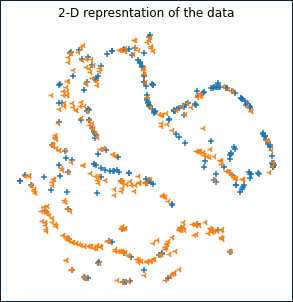

In [12]:
from sklearn.preprocessing import normalize
from sklearn.manifold import TSNE

train_without_na = train.dropna(subset=["Age"])
X_train_without_na = train_without_na.drop(["Survived","Name"], axis=1)
y_train_without_na = train_without_na["Survived"]

X_normalized = normalize(X_train_without_na)
X_embedded = TSNE(perplexity=14, n_iter=300).fit_transform(X_normalized)
plt.figure(linewidth=2, edgecolor="#04253a", figsize=(5,5))
plt.scatter(X_embedded[y_train_without_na == 1, 0], X_embedded[y_train_without_na == 1, 1], marker='+')
plt.scatter(X_embedded[y_train_without_na == 0, 0], X_embedded[y_train_without_na == 0, 1], marker='3')
plt.axis("off")
plt.title("2-D represntation of the data")
plt.show()

Looks somewhat seperable. Tbh, there is not much to learn from it. 

### Histograms of the contiguous features


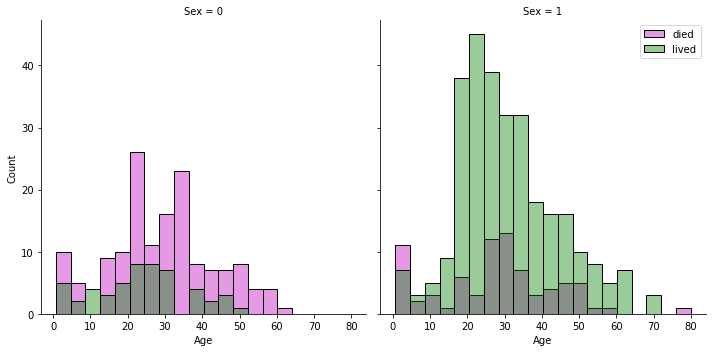

In [13]:
import seaborn as sns


sns.displot(data=train,x="Age",hue="Survived", alpha=0.4,palette=['g','m'],legend=False,col="Sex")
plt.legend(["died", "lived"])
plt.show()

Notice that most of the men who survived are either young kids, or young men - which means they could use physical strength in order to find their way to a boat (maybe?), \
this idea is supported by the fact that men over the age of 50 are extremly likely to end up dead in this case

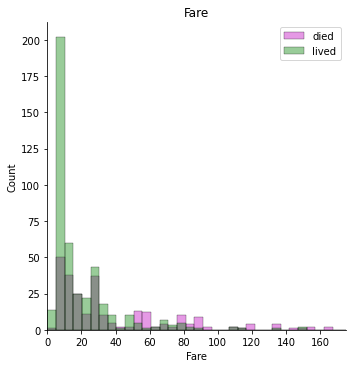

In [14]:
ax = sns.displot(data=train,x="Fare",hue="Survived", alpha=0.4, palette=['g','m'],legend=False)
plt.legend(["died", "lived"])
plt.title("Fare")
ax.set(xlim=(0, 175))
plt.show()

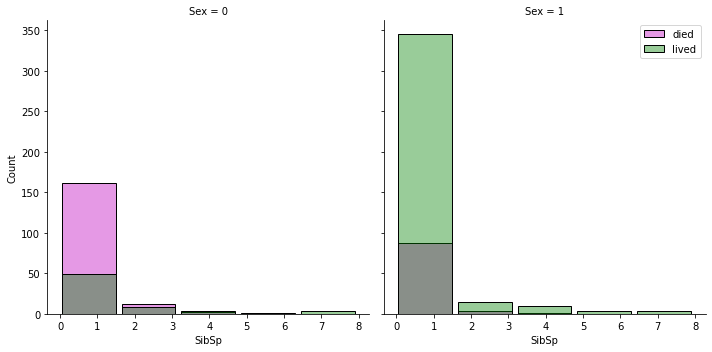

In [15]:
# reminder: SibSp = Number of Siblings/Spouses Aboard
ax = sns.displot(data=train,x="SibSp",hue="Survived", alpha=0.4, palette=['g','m'],legend=False, bins=5,shrink=.9,col="Sex")
plt.legend(["died", "lived"])
plt.show()

This graph results in a nice idea - we can see that whenever a female has more than 1 SibSp member with her on board - she is very likely to live! \
From this graph and the one following 3 features will be constructed:
* Single - if someone is alone onboard
* Lot_Sib - (=Lots of siblings) SibSp>=2
* Lot_Child - (=Lots of children) Parch >= 4

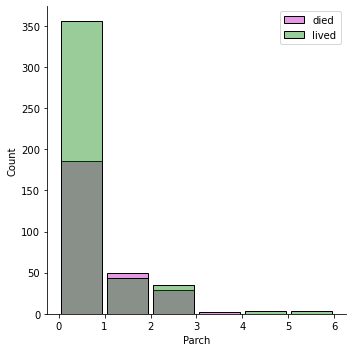

In [16]:
# reminder: Parch = Number of Parents/Children Aboard
ax = sns.displot(data=train,x="Parch",hue="Survived", alpha=0.4, palette=['g','m'],legend=False, bins=6,shrink=.9)
plt.legend(["died", "lived"])
plt.show()

This result is not suprising - it is likely that whoever had children or old parents to take care of had a lower chance of survival

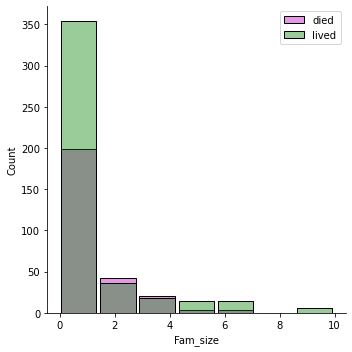

In [17]:
tmp_train = train.copy()
tmp_train["Fam_size"] = tmp_train["SibSp"] + tmp_train["Parch"]
ax = sns.displot(data=tmp_train,x="Fam_size",hue="Survived", alpha=0.4, palette=['g','m'],legend=False, bins=7,shrink=.9)
plt.legend(["died", "lived"])
plt.show()

From the above graph another feature will be constructed: 
* Big_Fam - (=Big family) Fam_Size>=4

### Pair plots
* first, couples of Categorical and Continuous features

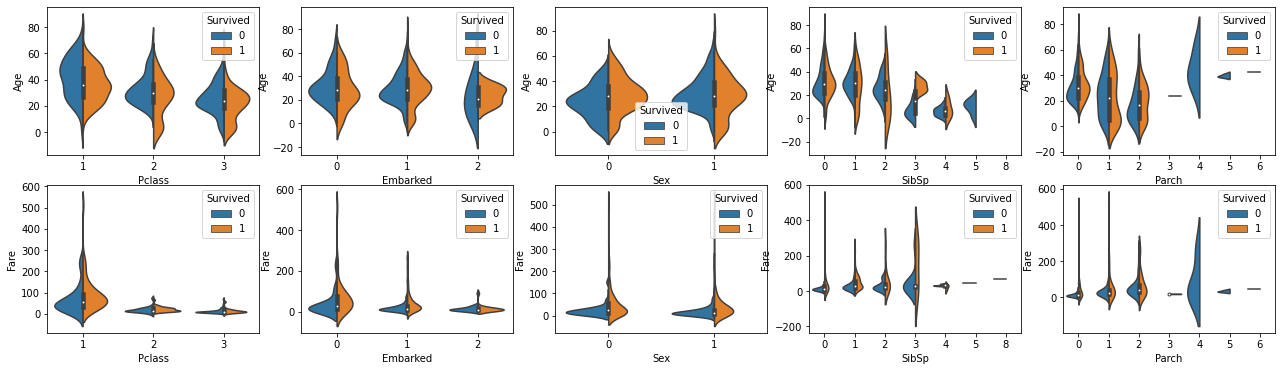

In [18]:
num_vars = ['Age', 'Fare']
cat_vars = ['Pclass', 'Embarked', 'Sex', "SibSp","Parch"]


plt.figure(figsize=(22,6))

for j,cont_variable in enumerate(num_vars):
    for i,cat_variable in enumerate(cat_vars):
        plt.subplot(2,5,i+1+5*j)
        sns.violinplot(x=cat_variable,y=cont_variable, hue="Survived", data=train, split=True)

plt.show()

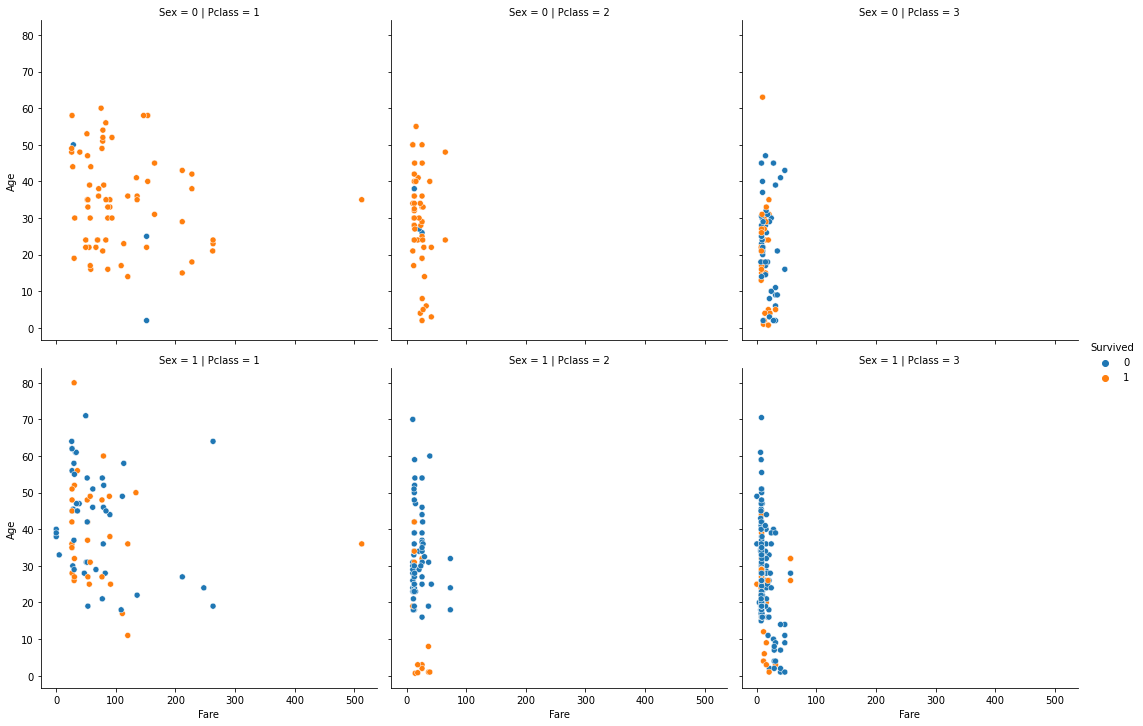

In [19]:
sns.relplot(data=train, x="Fare", y="Age", hue="Survived", col="Pclass", row="Sex")
plt.show()

We can see that female passengers from the 1st and 2nd classes have high chances of surviving, while also young, male passengers from the 2nd class lived as well

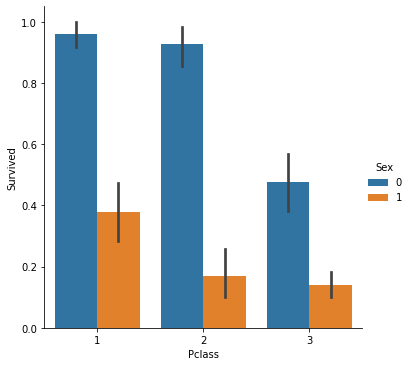

In [20]:
sns.catplot(x="Pclass", y="Survived", hue="Sex", kind="bar", data=train)
plt.show()

As seen in the above graph, we can see that female passengers of the 2nd class are very likely to survive, while 2nd class men arent likely to livesns.catplot(x="Pclass", y="Survived", hue="Sex", kind="bar", data=train)
plt.show()

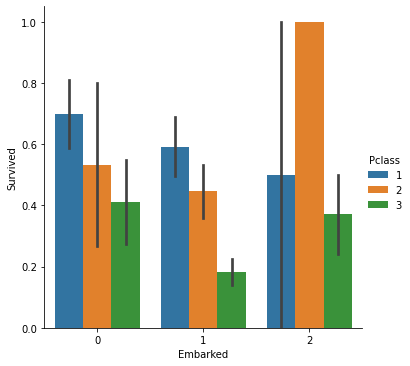

In [21]:
sns.catplot(x="Embarked", y="Survived", hue="Pclass", kind="bar", data=train)
plt.show()

From the above graph we can see that passengers for whom Embarked in Queenstown and are from the 2nd class have very high chances of surviving. \
Lets isolate them with another feature:
* Mid_Class_Q - (Middle class passenger from Queenstown) 

## Feature engineering - part 1
1) lets keep the age, we turn the age into a categorical feature as follows:
* Unknown age
* Toddler/baby - age 0-2
* Child - age 2-17
* Young_adult - 17-30
* Adult - 30-65
* Elderly - 65+
2) we'll make the fare a categorical feature as well:
* Fare>100
* 50<Fare<100
* 25<Fare<50
* 0<Fare<25
* Fare==0
3) Family size:
* Family_size = SibSp+Parch
4) Single:
* we want to have a feature that marks single people since they survive more often.
5) Lot_Sib - (=Lots of siblings) 
* SibSp>=2
6) Lot_Child - (=Lots of children) 
* Parch >= 4
7) Big_Fam - (=Big family) 
* Fam_Size >= 4
8) Mid_Class_Q - (Middle class passenger from Queenstown)
*  Pclass==2 and Embarked==2
9) Title:
* Extracting titles using regex and turning it into categrical data.

In [22]:
# 1. Age
X_train["Age"].fillna(-1, inplace=True) #unknown age = -1
# category = pd.cut(X_train.Age, bins=[-1,0,2,17,30,65,100],labels=['Unknown','Toddler/baby', 'Child', 'Young_adult' ,'Adult', 'Elderly'])
# X_train.insert(5,'Age_Group',category)
# X_train = pd.get_dummies(data=X_train, columns=["Age_Group"], dummy_na=True)
# X_train = X_train.drop(["Age"], axis=1)

In [23]:
# 2. Fare
# category = pd.cut(X_train.Fare, bins=[0,0.5,25,50,100,1000],labels=[0,1,2,3,4])
# X_train.insert(6,'Fare_Category',category)
# X_train = pd.get_dummies(data=X_train, columns=["Fare_Category"])
# X_train = X_train.drop(["Fare"], axis=1)

In [24]:
# 3. Family-Size
X_train["Family_Size"] = X_train["Parch"] + X_train["SibSp"]

In [25]:
# 4. Single
# X_train["Single"] = np.logical_and(X_train["Parch"]==0, X_train["SibSp"]==0).astype(int)

In [26]:
# 5. Lot_Sib
# X_train["Lot_Sib"] = (X_train["SibSp"] >= 2).astype(int)

In [27]:
# 6. Lot_Child
# X_train["Lot_Child"] = (X_train["Parch"] >= 4).astype(int)

In [28]:
# 7. Big_Fam
# X_train["Big_Fam"] = (X_train["Family_Size"] >= 4).astype(int)

In [29]:
# 8. Mid_Class_Q 
# X_train["Mid_Class_Q"] = np.logical_and(X_train["Pclass"]==2 , X_train["Embarked"]==2).astype(int)

In [30]:
# 9. Title 
import re


extract_title = lambda x: re.split("\.",re.split(",",x)[1])[0]
X_train["Title"] = X_train["Name"].apply(extract_title)
X_train.drop(["Name"], axis=1, inplace=True)

### Splitting Data

now we need to make sure we use a validation batch for model selection

In [31]:
from sklearn.model_selection import train_test_split


X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3)
X_train.reset_index(drop=True, inplace=True)
X_val.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
y_val.reset_index(drop=True, inplace=True)

In [32]:
from sklearn.preprocessing import OneHotEncoder


def dummy_features(data, encoder, fit: bool = False):
    if fit:
        encoder.fit(data[["Embarked", "Title"]])

    one_hot_features = encoder.transform(data[["Embarked", "Title"]])

    column_names = encoder.get_feature_names(["Embarked", "Title"])
    one_hot_features = pd.DataFrame(one_hot_features, columns=column_names)
    data = data.join(one_hot_features)
    data.drop(labels=["Embarked", "Title"], axis=1, inplace=True)
    return data, encoder

encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
X_train, encoder = dummy_features(data=X_train, encoder=encoder, fit=True)
X_val, _ = dummy_features(data=X_val, encoder=encoder, fit=False)

X_train_reduced = X_train.copy()
X_val_reduced = X_val.copy()

### Standard scaling the data:
first we normalize contingous features.

In [33]:
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
continous_columns = ("Family_Size","SibSp","Parch","Pclass")
scaler.fit(X_train_reduced.loc[:,continous_columns])
X_train_reduced.loc[:,continous_columns] = scaler.transform(X_train_reduced.loc[:,continous_columns], copy=False)
X_val_reduced.loc[:,continous_columns] = scaler.transform(X_val_reduced.loc[:,continous_columns], copy=False)

### Feature selection
We select features using a logistic regression classifier.\
Classifiers are trained consequently one by one, each with an addiitional feature, in order to find the best number of features for our models.

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFECV

clf = LogisticRegression(C=1.59228279, solver='saga', max_iter=10000)
selector = RFECV(clf, min_features_to_select=12, scoring="balanced_accuracy")
selector.fit(X_train_reduced, y_train)
cols = selector.get_support(indices=True)
X_train_reduced = X_train_reduced.iloc[:,cols]
X_val_reduced = X_val_reduced.iloc[:,cols]
X_train_reduced.head()

,Pclass,Sex,Family_Size,Embarked_0,Embarked_1,Title_ Dr,Title_ Master,Title_ Mr,Title_ Mrs,Title_ Ms,Title_ Rev,Title_ Sir
0,0.812611,0,0.064557,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.400205,1,-0.577140,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.812611,0,0.706254,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,-1.613021,0,1.989648,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-1.613021,0,0.064557,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


## Simple Classifiers


Great \
Lets train some classifiers in order to get a grasp!now we need to make sure we use a validation batch for model selection

In [35]:
import scipy.stats as stats
from sklearn.metrics import plot_confusion_matrix, f1_score, balanced_accuracy_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

### Logistic Regression

train score: 0.804
Val score: 0.809


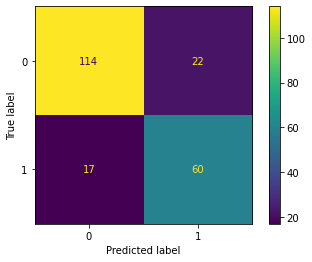

{'Cs': 100,
 'class_weight': None,
 'cv': 5,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1.0,
 'l1_ratios': [0.755142449881663,
  0.9564672351738729,
  0.4932782601330389,
  0.6160961513079908,
  0.8801183554530113,
  0.7314380834288144,
  0.04454042729447605,
  0.8269564277601866,
  0.45389341455842436,
  0.5980852125248559,
  0.21706523612868922,
  0.9299880776325375,
  0.5196165109709577,
  0.6155321123328694,
  0.568571120985092,
  0.22484807738568213,
  0.9407903459686724,
  0.9323982311718921,
  0.5914139284279859,
  0.3289075948252219,
  0.32420952239677325,
  0.42073194648429224,
  0.9970181909293577,
  0.7435359900651808,
  0.9344170629002139,
  0.9888549070550433,
  0.4167012743802252,
  0.9470474131179065,
  0.42469193977680697,
  0.85028513124758,
  0.8783557481005628,
  0.7852581069666481,
  0.1554312021389388,
  0.5403575053686875,
  0.3716525152016814,
  0.46975238470755487,
  0.00875999900865776,
  0.2977112998182334,
  0.6867985363027005,
  0.04913135

In [36]:
from sklearn.linear_model import LogisticRegressionCV


# Applying grid search with randomalized l1_ratios so that queet is actualy an implementation of a random search
l1_ratios_list = list(stats.uniform(0,1).rvs(100))
log_reg_optimized = LogisticRegressionCV(Cs=100, penalty='elasticnet',solver='saga', cv=5, l1_ratios=l1_ratios_list,
                                         scoring='balanced_accuracy', max_iter=10000, multi_class='ovr')

log_reg_optimized.fit(X_train_reduced, y_train)

train_score = log_reg_optimized.score(X_train_reduced, y_train)
print(f"train score: {train_score:.3f}")

val_score = log_reg_optimized.score(X_val_reduced, y_val)
print(f"Val score: {val_score:.3f}")
plot_confusion_matrix(log_reg_optimized,X_val_reduced, y_val)
plt.show()
log_reg_optimized.get_params()

In [37]:
log_reg_optimized.C_

array([5.85702082])

### KNN

train score: 0.850
validation score: 0.798
val f1 score: 0.732
val accuracy score: 0.816


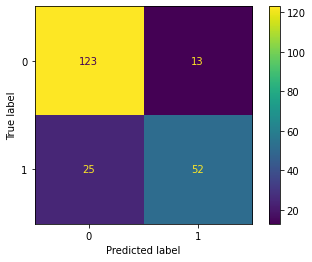

In [38]:
from sklearn.neighbors import KNeighborsClassifier


parameters = {
              'n_neighbors':np.arange(1,12), 
              'p':np.arange(1,6), 
              'weights':['uniform','distance']
             }

knn_clf = KNeighborsClassifier()
knn_clf_optimized = GridSearchCV(knn_clf, parameters, return_train_score=True, scoring='balanced_accuracy')
knn_clf_optimized.fit(X_train_reduced, y_train)

train_score = balanced_accuracy_score(knn_clf_optimized.predict(X_train_reduced), y_train)
print(f"train score: {train_score:.3f}")

print(f"validation score: {knn_clf_optimized.best_score_:.3f}")

val_score = f1_score(knn_clf_optimized.predict(X_val_reduced),y_val)
print(f"val f1 score: {val_score:.3f}")
print(f"val accuracy score: {balanced_accuracy_score(knn_clf_optimized.predict(X_val_reduced), y_val):.3f}")

plot_confusion_matrix(knn_clf_optimized,X_val_reduced, y_val)
plt.show()

### SVM

train score: 0.832
validation score: 0.802
val f1 score: 0.750
val accuracy score: 0.808


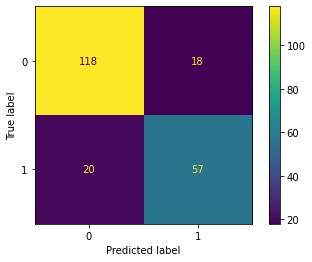

In [39]:
from sklearn.svm import SVC


# parameters for later doing parameter tuning through a grid-search
parameters = {
              'gamma':["scale","auto"],
              'class_weight':[None,"balanced"], 
              'C':stats.expon(),
              'kernel':['poly','rbf'], 
              'degree':[1,2,3,4,5],
              'decision_function_shape':['ovo']
             }

svm_clf = SVC()

svm_clf_optimized = RandomizedSearchCV(svm_clf, param_distributions=parameters, n_iter=10000, scoring='balanced_accuracy',return_train_score=True)
svm_clf_optimized.fit(X_train_reduced, y_train)

train_score = balanced_accuracy_score(svm_clf_optimized.predict(X_train_reduced), y_train)
print(f"train score: {train_score:.3f}")

print(f"validation score: {svm_clf_optimized.best_score_:.3f}")

val_score = f1_score(svm_clf_optimized.predict(X_val_reduced), y_val)
print(f"val f1 score: {val_score:.3f}")
print(f"val accuracy score: {balanced_accuracy_score(svm_clf_optimized.predict(X_val_reduced), y_val):.3f}")

plot_confusion_matrix(svm_clf_optimized, X_val_reduced, y_val)
plt.show()

### MLP

train score: 0.814
validation score: 0.811
val f1 score: 0.753
val accuracy score: 0.796


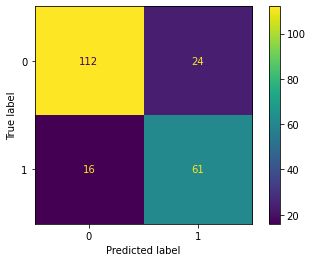

In [40]:
from sklearn.neural_network import MLPClassifier


parameters = {'solver':['adam','lbfgs'], 
              'alpha': stats.expon(),
              'hidden_layer_sizes':[(x,) for x in np.arange(20,60)],
              'learning_rate_init': stats.uniform(0,1),
              'learning_rate': ['constant', 'invscaling', 'adaptive'],
              'learning_rate_init': stats.uniform(0,1),
              'max_iter':[30000],
              'momentum': stats.uniform(0,1),
              'nesterovs_momentum': [True, False]
             }

mlp_clf = MLPClassifier()

mlp_clf_optimized = RandomizedSearchCV(mlp_clf, param_distributions=parameters, n_iter=10000, scoring='balanced_accuracy',return_train_score=True)
mlp_clf_optimized.fit(X_train_reduced, y_train)

train_score = balanced_accuracy_score(mlp_clf_optimized.predict(X_train_reduced), y_train)
print(f"train score: {train_score:.3f}")

print(f"validation score: {mlp_clf_optimized.best_score_:.3f}")

val_score = f1_score(mlp_clf_optimized.predict(X_val_reduced), y_val)
print(f"val f1 score: {val_score:.3f}")
print(f"val accuracy score: {balanced_accuracy_score(mlp_clf_optimized.predict(X_val_reduced), y_val):.3f}")

plot_confusion_matrix(mlp_clf_optimized, X_val_reduced, y_val)
plt.show()

### Decision-Trees
"Trees have one aspect that prevents them from being the ideal tool for predictive learning, namely inaccuracy." - The Elements of Statistical Learning

train score: 0.801
validation score: 0.812
val f1 score: 0.724
val accuracy score: 0.764


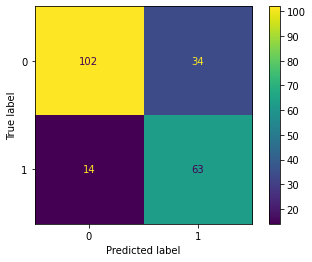

In [41]:
from sklearn.tree import DecisionTreeClassifier, plot_tree


clf = DecisionTreeClassifier()
alphas = list(clf.cost_complexity_pruning_path(X_train, y_train).ccp_alphas)
alphas.append(0)

parameters = {'ccp_alpha':alphas,
             'max_features':['auto', 'sqrt', "log2"],
             'class_weight':['balanced',None],
              'max_depth': [4,5,6,7]
             }
optimized_dt = GridSearchCV(clf, parameters,scoring='balanced_accuracy')
optimized_dt.fit(X_train, y_train)

train_score = balanced_accuracy_score(optimized_dt.predict(X_train), y_train)
print(f"train score: {train_score:.3f}")

print(f"validation score: {optimized_dt.best_score_:.3f}")

val_score = f1_score(optimized_dt.predict(X_val), y_val)
print(f"val f1 score: {val_score:.3f}")
print(f"val accuracy score: {balanced_accuracy_score(optimized_dt.predict(X_val), y_val):.3f}")

plot_confusion_matrix(optimized_dt, X_val, y_val)
plt.show()

DecisionTreeClassifier(ccp_alpha=0.00223563603845294, class_weight='balanced',
                       max_depth=5, max_features='auto')

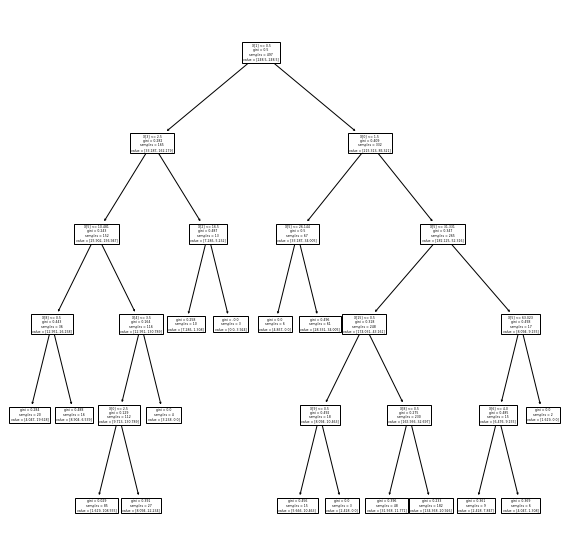

In [42]:
plt.figure(figsize=(10,10))
plot_tree(optimized_dt.best_estimator_)
optimized_dt.best_estimator_

### Random Forest
Funny thing but the random forest classifier works best without prior feature selection, which is quite intuitive since the trees choose the relevant features by themselves anyways.\
The parameters were fine tuned by hand.


train balanced accuracy score: 0.873
out-of-bag balanced accuracy score: 0.833
val f1 score: 0.760
val balanced accuracy score: 0.819


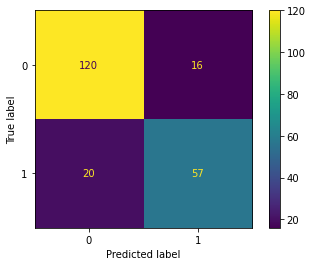

In [43]:
from sklearn.ensemble import RandomForestClassifier


rf_clf = RandomForestClassifier(criterion="gini",
                                n_estimators=3000,
                                oob_score=True,
                                ccp_alpha=.0007984414423046222,
                                min_samples_leaf=3,
                                n_jobs=-1)
rf_clf.fit(X_train, y_train)
train_score = balanced_accuracy_score(rf_clf.predict(X_train), y_train)
print(f"train balanced accuracy score: {train_score:.3f}")
print(f"out-of-bag balanced accuracy score: {rf_clf.oob_score_:.3f}")
val_f1_score = f1_score(rf_clf.predict(X_val), y_val)
print(f"val f1 score: {val_f1_score:.3f}")
print(f"val balanced accuracy score: {balanced_accuracy_score(rf_clf.predict(X_val), y_val):.3f}")

plot_confusion_matrix(rf_clf, X_val, y_val)
plt.show()

### AdaBoost

train score: 0.891
validation score: 0.815
val f1 score: 0.744
val accuracy score: 0.796


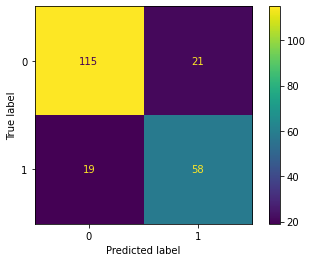

In [44]:
from sklearn.ensemble import AdaBoostClassifier


parameters = {
          'learning_rate' : stats.uniform(0,4),
          'n_estimators':np.arange(100,1000)
        }
param_comb = 1000

adaboost_clf = AdaBoostClassifier()
optimized_adaboost_clf = RandomizedSearchCV(adaboost_clf, param_distributions=parameters, n_iter=param_comb, scoring='balanced_accuracy', n_jobs=-1)
optimized_adaboost_clf.fit(X_train, y_train)


train_score = balanced_accuracy_score(optimized_adaboost_clf.predict(X_train), y_train)
print(f"train score: {train_score:.3f}")

print(f"validation score: {optimized_adaboost_clf.best_score_:.3f}")

val_score = f1_score(optimized_adaboost_clf.predict(X_val), y_val)
print(f"val f1 score: {val_score:.3f}")
print(f"val accuracy score: {balanced_accuracy_score(optimized_adaboost_clf.predict(X_val), y_val):.3f}")

plot_confusion_matrix(optimized_adaboost_clf, X_val, y_val)
plt.show()

### Gradient Boosting

Fitting 5 folds for each of 10000 candidates, totalling 50000 fits
train score: 0.930
validation score: 0.823
val f1 score: 0.790
val accuracy score: 0.831


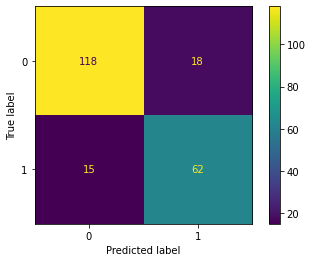

In [45]:
from sklearn.ensemble import GradientBoostingClassifier


parameters = {
                'learning_rate':stats.uniform(0,1), 
                'subsample': stats.uniform(0,1),
                'ccp_alpha':alphas,
                'max_depth': [3, 4, 5, 6],
                'n_estimators':list(np.arange(100,1000)),
                'min_samples_leaf':[1,2,3,4,5]
}

param_comb = 10000

gboost_clf = GradientBoostingClassifier()
optimized_gboost_clf = RandomizedSearchCV(gboost_clf, param_distributions=parameters, n_iter=param_comb, scoring='balanced_accuracy', n_jobs=4, verbose=3)
optimized_gboost_clf.fit(X_train, y_train)


train_score = balanced_accuracy_score(optimized_gboost_clf.predict(X_train), y_train)
print(f"train score: {train_score:.3f}")

print(f"validation score: {optimized_gboost_clf.best_score_:.3f}")

val_score = f1_score(optimized_gboost_clf.predict(X_val), y_val)
print(f"val f1 score: {val_score:.3f}")
print(f"val accuracy score: {balanced_accuracy_score(optimized_gboost_clf.predict(X_val), y_val):.3f}")

plot_confusion_matrix(optimized_gboost_clf, X_val, y_val)
plt.show()

In [46]:
res = pd.DataFrame(optimized_gboost_clf.cv_results_)
res[res["mean_test_score"]>0.805]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_ccp_alpha,param_learning_rate,param_max_depth,param_min_samples_leaf,param_n_estimators,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
71,0.599813,0.010416,0.007400,0.004317,0.001303,0.381323,5,5,347,0.646373,"{'ccp_alpha': 0.0013030564338411422, 'learning...",0.851443,0.801783,0.733822,0.812770,0.832399,0.806443,0.040085,146
160,1.283068,0.042762,0.006673,0.001126,0.001852,0.206962,5,3,814,0.57598,"{'ccp_alpha': 0.0018520388741716702, 'learning...",0.827250,0.772496,0.794651,0.825928,0.806083,0.805281,0.020481,181
223,0.991041,0.036910,0.005026,0.000635,0.001677,0.192831,5,3,611,0.50212,"{'ccp_alpha': 0.0016767270288397047, 'learning...",0.866723,0.801783,0.789689,0.850518,0.806083,0.822959,0.030050,1
237,1.092703,0.056315,0.006826,0.002576,0.001677,0.093132,3,2,801,0.650122,"{'ccp_alpha': 0.0016767270288397047, 'learning...",0.848472,0.788625,0.789689,0.842321,0.784728,0.810767,0.028390,57
243,0.661547,0.020919,0.006704,0.003272,0.002418,0.394128,6,1,386,0.533085,"{'ccp_alpha': 0.002418356291595728, 'learning_...",0.803056,0.814941,0.770060,0.816005,0.845557,0.809924,0.024364,71
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9824,1.014143,0.018474,0.005481,0.003318,0.003593,0.083703,6,2,808,0.292903,"{'ccp_alpha': 0.0035932998276021915, 'learning...",0.832343,0.772496,0.792925,0.799612,0.848792,0.809233,0.027594,88
9856,1.086940,0.006889,0.008247,0.007567,0.001509,0.055369,3,2,930,0.476375,"{'ccp_alpha': 0.0015090543259557343, 'learning...",0.832343,0.793718,0.781493,0.802847,0.819241,0.805928,0.018059,160
9862,1.312871,0.014865,0.006244,0.005118,0.001761,0.269808,5,4,944,0.683397,"{'ccp_alpha': 0.0017605633802816902, 'learning...",0.874788,0.804754,0.768335,0.792925,0.784728,0.805106,0.036801,190
9879,0.346410,0.009992,0.004669,0.000921,0.002418,0.155993,6,4,262,0.363044,"{'ccp_alpha': 0.002418356291595728, 'learning_...",0.819185,0.809847,0.781493,0.850518,0.792925,0.810794,0.023779,54


### XGBoost
The XGBoost algo was tuned by hand, following the attached tutorial:\
https://towardsdatascience.com/fine-tuning-xgboost-in-python-like-a-boss-b4543ed8b1e

In [47]:
import time
from xgboost import XGBClassifier
from sklearn.metrics import balanced_accuracy_score, f1_score, plot_confusion_matrix


xgb_clf = XGBClassifier(learning_rate=0.01, 
                        n_estimators=600, 
                        max_depth=3, 
                        subsample=0.85, 
                        colsample_bytree=1, 
                        gamma=1, 
                        use_label_encoder=False)
    
eval_set = [(X_train, y_train), (X_val, y_val)]
eval_metric = ["auc","error"]
xgb_clf.fit(X_train, y_train, eval_metric=eval_metric, eval_set=eval_set, verbose=False)
res = xgb_clf.evals_result()


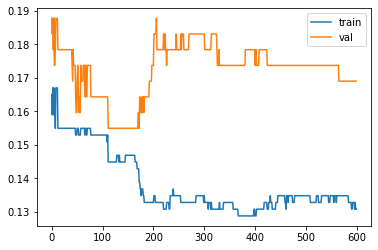

In [48]:
plt.plot(res["validation_0"]['error'])
plt.plot(res["validation_1"]['error'])
plt.legend(["train","val"])
plt.show()

trainig accuracy score: 0.867
val accuracy score: 0.819


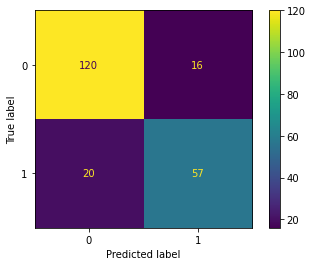

In [49]:
print(f"trainig accuracy score: {balanced_accuracy_score(xgb_clf.predict(X_train), y_train):.3f}")
print(f"val accuracy score: {balanced_accuracy_score(xgb_clf.predict(X_val), y_val):.3f}")

plot_confusion_matrix(xgb_clf, X_val, y_val)
plt.show()

### Thought about the pre-processing:
1) Normalizing the features is not needed when using tree models, hence deleted.
2) Extra features created using "if" statements are not needed since the trees have the property of creating such decision boundaries. Moreover - those additional features make the confusion matrix non-symetric! 
3) Turning the continous features into categorical was also not helpful, since tree models select thresholds in the training of the models.

The selected model is the XGB. \
Funny enough, using a new validation set (since it is seleceted by random every time) we get very different result, but similar oob score, which is reassuring we have selected the model well. \
Next, lets try and do some false analysis in order to maybe tune the model even better.
### False Analysis

In [50]:
# extracting the false positive and false negative examples
pred_y_val = xgb_clf.predict(X_val)
fp_ind = np.logical_and(pred_y_val==1, y_val==0)
fn_ind = np.logical_and(pred_y_val==0, y_val==1)
tp_ind = np.logical_and(pred_y_val==1, y_val==1)
tn_ind = np.logical_and(pred_y_val==0, y_val==0)

In [1]:
tmp_X_val = X_val.copy()

NameError: name 'X_val' is not defined

In [ ]:
tmp_X_val[["Embarked", "Title"]] = encoder.inverse_transform(tmp_X_val[encoder.get_feature_names(["Embarked", "Title"])])
tmp_X_val.drop(labels=encoder.get_feature_names(["Embarked", "Title"]), axis=1, inplace=True)
tmp_X_val.head()

In [ ]:
tmp_X_val.head()

In [ ]:
fp = tmp_X_val.loc[fp_ind,:]
fn = tmp_X_val.loc[fn_ind,:]
tp = tmp_X_val.loc[tp_ind,:]
tn = tmp_X_val.loc[tn_ind,:]

In [ ]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.hist(tp["Title"].dropna())
plt.title("True Positive")
plt.subplot(2,2,2)
plt.hist(fp["Title"])
plt.title("False Positive")
plt.subplot(2,2,3)
plt.hist(fn["Title"])
plt.title("False Negative")
plt.subplot(2,2,4)
plt.hist(tn["Title"])
plt.title("True Negative")
plt.show()

In [ ]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.hist(tp["Embarked"].dropna())
plt.title("True Positive")
plt.subplot(2,2,2)
plt.hist(fp["Embarked"])
plt.title("False Positive")
plt.subplot(2,2,3)
plt.hist(fn["Embarked"])
plt.title("False Negative")
plt.subplot(2,2,4)
plt.hist(tn["Embarked"])
plt.title("True Negative")
plt.show()